# UNDERSTANDING EXPERIMENTAL DATA

This chapter is about `understanding experimental data`. 

We will

* make extensive use of `plotting to visualize the data`, and 

* show how to use `linear regression` to build a model of experimental data.

## The Behavior of Projectiles

We decided to use one of our springs to build `a device capable of launching a projectile`. 

We used the device **four** times to fire a projectile at **a target** 1080 inches from the **launching point**. 

Each time, we measured `the height of the projectile` at various `distances from the launching point`.

* The `launching point` and the `target` were at `the same height`, which we treated as `0.0` in our measurements.

![projectile](./img/projectile.jpg)

The data was stored in a file `./data/projectileData.txt`

* The `first column` contains `distances of the projectile from the target`. 

* The `other columns` contain `the height of the projectile at that distance` for each of the four trials. 

All of the measurements are in **inches**.

In [1]:
%%file ./data/projectileData.txt
Distance  	trial1	trial2	trial3	trial4
1080	  	0.0	    0.0		0.0		0.0
1044		2.25	3.25	4.5		6.5	
1008		5.25	6.5		6.5		8.75
972			7.5		7.75	8.25	9.25
936			8.75	9.25	9.5		10.5
900			12.0	12.25	12.5	14.75
864			13.75	16.0	16.6	16.5
828			14.75	15.25	15.5	17.5
792			15.5	16.0	16.6	16.75
756			17.0	17.0	17.5	19.25
720			17.5	18.5	18.5	19.0
540			19.5	18.5	19.0	19.0
360			18.5	18.5	19.0	19.0
180			13.0	13.0	13.0	13.0
0			0.0		0.0		0.0		0.0

Overwriting ./data/projectileData.txt


The following code was used to plot :

* the **mean altitude of the projectile(Y)** against the **distance from the point of launch(X)**.

* the best `linear` and `quadratic` fits to the points.

```python
d2h={'d':None,'h':[]}
```

In [6]:
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    d2hs=[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        dhs = line.split()
        d2h={'d':None,'h':[]}
        # the distance in first column
        d2h['d']=float(dhs[0])
        trials=len(dhs)-1
        for i in range(trials):
            d2h['h'].append(float(dhs[i+1]))
        d2hs.append(d2h)
    dataFile.close()
    return  d2hs,trials

In [7]:
fileName='./data/projectileData.txt'
d2hs,trials = getTrajectoryData(fileName)
for item in d2hs:
    print(item) 

{'d': 1080.0, 'h': [0.0, 0.0, 0.0, 0.0]}
{'d': 1044.0, 'h': [2.25, 3.25, 4.5, 6.5]}
{'d': 1008.0, 'h': [5.25, 6.5, 6.5, 8.75]}
{'d': 972.0, 'h': [7.5, 7.75, 8.25, 9.25]}
{'d': 936.0, 'h': [8.75, 9.25, 9.5, 10.5]}
{'d': 900.0, 'h': [12.0, 12.25, 12.5, 14.75]}
{'d': 864.0, 'h': [13.75, 16.0, 16.6, 16.5]}
{'d': 828.0, 'h': [14.75, 15.25, 15.5, 17.5]}
{'d': 792.0, 'h': [15.5, 16.0, 16.6, 16.75]}
{'d': 756.0, 'h': [17.0, 17.0, 17.5, 19.25]}
{'d': 720.0, 'h': [17.5, 18.5, 18.5, 19.0]}
{'d': 540.0, 'h': [19.5, 18.5, 19.0, 19.0]}
{'d': 360.0, 'h': [18.5, 18.5, 19.0, 19.0]}
{'d': 180.0, 'h': [13.0, 13.0, 13.0, 13.0]}
{'d': 0.0, 'h': [0.0, 0.0, 0.0, 0.0]}


### 1 Linear Regression to Find a Fit

Whenever we fit any curve (including a line) to data we need some way to decide `which curve is the best fit for the data`. 

This means that we need to define <b style="color:blue">an objective function</b> that provides `a quantitative assessment of how well the curve fits the data`. 

Once we have such `a function`, finding the best fit can be formulated as

* finding a curve that <b style="color:blue">minimizes (or maximizes)</b> the value of that function, i.e., as **an optimization problem** 

The most commonly used objective function is called <b style="color:blue">least squares(最小二乘)</b>,

The objective function is then defined as

$$\sum_{i=0}^{len(observed)-1}(observed[i]-predicted[i])^2$$



**Numpy.polyfit**

http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

`Numpy` provides a function, `polyfit`, that finds the best Least squares polynomial fit.
```python
numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```
The algorithm used by `polyfit` is called <b style="color:blue">linear regression</b>.

Fit a polynomial of degree `deg` to points (x, y). 

$$p(x) = p[0] * x^{deg} + ... + p[deg]$$

Returns a vector of **coefficients `p`** that minimises the squared error.



```python
numpy.polyfit(observedXVals, observedYVals, n)
numpy.polyfit(observedXVals, observedYVals, 1) # y = ax + b
numpy.polyfit(observedXVals, observedYVals, 2) # y = ax^2 + bx+c
```


In [2]:
import numpy as np

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 2)
z

array([-0.16071429,  0.50071429,  0.22142857])

### 2 Using numpy.polyfit to fit the experimental data

* linear fit : `a,b = np.polyfit(distances, meanHeights, 1)`
  
* quadratic fit: `a,b,c = np.polyfit(distances, meanHeights, 2)`

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def processTrajectories(d2hs,trials):
    numTrials = trials
    distances=[]
    meanHeights=[]
    
    for item in d2hs:
        distances.append(item['d'])
        meanHeights.append(np.mean(item['h']))
    
    plt.title('Trajectory of Projectile (Mean Height of {} Trials'.format(trials))
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Mean Height of the projectile')
    
    # the experimental data
    plt.plot( distances, meanHeights, 'ro')
    
    # Linear Fit
    a,b = np.polyfit(distances, meanHeights, 1)
    altitudes = a*np.array(distances) + b
    plt.plot(distances, altitudes, 'g', label = 'Linear Fit')
    
    # Quadratic Fit
    a,b,c = np.polyfit(distances, meanHeights, 2)
 
    altitudes = a*(np.array(distances)**2) +  b*np.array(distances) + c
    plt.plot(distances, altitudes, 'b:', label = 'Quadratic Fit')
    plt.legend(loc="best")
    plt.show()


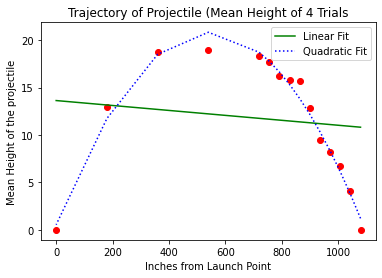

In [8]:
processTrajectories(d2hs,trials)

A quick look at the plot on the right makes it quite clear that

* a **quadratic** fit is far better than a linear one

<b style="color:blue;font-size:120%">how bad a fit is the line and how good is the quadratic fit?</b>

* **Coefficient of Determination(决定系数)**

---
####  something about plotting lines with matplotlib.pyplot

* [Unit2-2-PLOTTING-USING-MATPLOTLIB](./Unit2-2-PLOTTING-USING-MATPLOTLIB.ipynb)

The function `processTrajectories` plot lines with a legend(图例说明)  

**line styles**

* the linear fit for the data.:  plt.plot(distances, altitudes, 'g', label = 'Linear Fit')

  *  <b style="color:blue">green solid line</b> 

* the quadratic fit for the data.:  plt.plot(distances, altitudes, 'b:', label = 'Quadratic Fit')

   * <b style="color:blue">blue dot line</b> 
   
**Legend of matplotlib.pyplot**

* **label**：a legend of line      
       
* **Place a legend on the axes**

  *  `plt.legend(loc ='best')` # Place a legend on the axes.

Location String： **`'best'`**   

> reference: [matplotlib.pyplot.legend](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.legend.html): 

---

### 3 Coefficient of Determination



Asking about **the goodness of a fit** is equivalent to asking about the accuracy of these predictions.

<b>The mean square error</b> is useful for comparing the <b>relative goodness</b> of two fits to the same data, 

it is <b>not particularly useful for getting a sense of the absolute goodness of a fit</b>.

We can calculate <b>the absolute goodness of a fit</b> using the <b>coefficient of determination(确定系数)</b>, often written as

$R^2$

Let:

* $y_i$ be the $i^{th}$ observed value,

* $p_i$ be the corresponding value predicted by model, and 

* $\mu$ be the **mean** of the observed values.

$$R^2=1-\frac{\sum_{i}(y_i-p_i)^2}{\sum_{i}(y_i-\mu)^2}$$

By comparing

<b>the estimation errors</b> (<b>RSS: residual sum of squares</b>) 

$\sum_{i}(y_i-p_i)^2$

with

<b>the variability of the original values</b> ( <b>TSS: total sum of squares</b>), 

$\sum_{i}(y_i-\mu)^2$

$R^2$ is intended to capture <b>the proportion of variability </b> in a data set that is accounted for by the statistical model provided by the fit.

Its <b>compactness</b> stems from the expressiveness of the operations on <b>arrays</b>.

In [7]:
def rSquared(measured, predicted):
    """Assumes measured a one-dimensional array of measured values
               predicted a one-dimensional array of predicted values
       Returns coefficient of determination"""
    # RSS: residual sum of squares
    estimateError = ((predicted - measured)**2).sum()
    
    # TSS: total sum of squares
    meanOfMeasured = sum(measured)/float(len(measured))
    variability = ((measured - meanOfMeasured)**2).sum()
    
    return 1 - estimateError/variability

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def processTrajectories(d2hs,trials):
    numTrials = trials
    distances=[]
    meanHeights=[]
    
    for item in d2hs:
        distances.append(item['d'])
        meanHeights.append(np.mean(item['h']))
    
    plt.title('Trajectory of Projectile (Mean Height of {} Trials'.format(trials))
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Mean Height of the projectile')
   
    # the experimental data
    plt.plot( distances, meanHeights, 'ro')
   
    # Linear Fit
    a,b = np.polyfit(distances, meanHeights, 1)
    altitudes = a*np.array(distances) + b
    
    r1line=rSquared(meanHeights, altitudes)
    plt.plot(distances, altitudes, 'g', label = "Linear Fit, $R^2$= {:.2f}".format(r1line))
    
    # Linear Fit
    a,b,c = np.polyfit(distances, meanHeights, 2)
 
    altitudes = a*(np.array(distances)**2) +  b*np.array(distances) + c
             
    r2quad=rSquared(meanHeights, altitudes)          
    plt.plot(distances, altitudes, 'b:',label ="Quadratic Fit, $R^2$= {:.2f}".format(r2quad))
    plt.legend()
    plt.show()



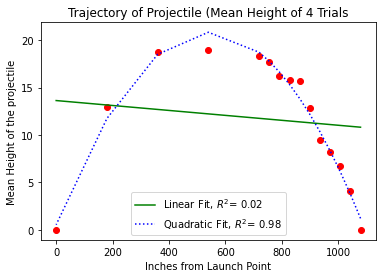

In [13]:
processTrajectories(d2hs,trials)

This tells us that 

* 1 less than 2% of the variation in the measured data can be explained by the linear model,

* 2 more than **98%** of the  variation can be explained by the quadratic model

#### Matplotlib.pyplot: Formatting text: LaTeX
```python
  plt.plot(distances, altitudes, 'g', label = "Linear Fit, $R^2$= {:.2f}".format(r1line))
```
Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.).

* For example, `$R^2$`. $R^2$

##  4 Python Script

```
python trajector.py
```

In [17]:
%%file ./trajector.py
import numpy as np
import matplotlib.pyplot as plt

def rSquared(measured, predicted):
    """Assumes measured a one-dimensional array of measured values
               predicted a one-dimensional array of predicted values
       Returns coefficient of determination"""
    # RSS: residual sum of squares
    estimateError = ((predicted - measured)**2).sum()
    
    # TSS: total sum of squares
    meanOfMeasured = sum(measured)/float(len(measured))
    variability = ((measured - meanOfMeasured)**2).sum()
    
    return 1 - estimateError/variability

def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    d2hs=[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        dhs = line.split()
        d2h={'d':None,'h':[]}
        # the distance in first column
        d2h['d']=float(dhs[0])
        trials=len(dhs)-1
        for i in range(trials):
            d2h['h'].append(float(dhs[i+1]))
        d2hs.append(d2h)
    dataFile.close()
    return  d2hs,trials

def processTrajectories(d2hs,trials):
    numTrials = trials
    distances=[]
    meanHeights=[]
    
    for item in d2hs:
        distances.append(item['d'])
        meanHeights.append(np.mean(item['h']))

    plt.title('Trajectory of Projectile (Mean Height of {} Trials'.format(trials))   
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Mean Height of the projectile')
   
    # the experimental data
    plt.plot( distances, meanHeights, 'ro')
   
    # Linear Fit
    a,b = np.polyfit(distances, meanHeights, 1)
    altitudes = a*np.array(distances) + b
    
    r1line=rSquared(meanHeights, altitudes)
    plt.plot(distances, altitudes, 'g', label = "Linear Fit, $R^2$= {:.2f}".format(r1line))
    
    # Linear Fit
    a,b,c = np.polyfit(distances, meanHeights, 2)
 
    altitudes = a*(np.array(distances)**2) +  b*np.array(distances) + c
             
    r2quad=rSquared(meanHeights, altitudes)          
    plt.plot(distances, altitudes, 'b:',label ="Quadratic Fit, $R^2$= {:.2f}".format(r2quad))
    plt.legend()
    plt.show()

if __name__ == "__main__":  
    fileName='./data/projectileData.txt'
    d2hs,trials = getTrajectoryData(fileName)
    processTrajectories(d2hs,trials)

Overwriting ./trajector.py


## Further Reading : When Theory Is Missing

In an ideal world, we would run **a controlled experiment** (e.g., hang weights from a spring), study the results, and retrospectively formulate a model consistent
with those results.

Unfortunately, in many cases it is **impossible to run even one controlled experiment**

In such situations, one can **simulate a set of experiments** by dividing the existing data into **a training set** and **a holdout set**.

### How does one choose the training set?

1. One way to do this is to **randomly choose the samples** for the training set.

2.  A related but slightly different way to check a model is to train on **many randomly selected subsets** of the original data, and see how similar the models are to one another. 

If they are quite similar, than we can feel pretty good. This  approach is known as **cross validation**. 
